# DAV 5400Project 1 (M6)

# Human Development Index (HDI)

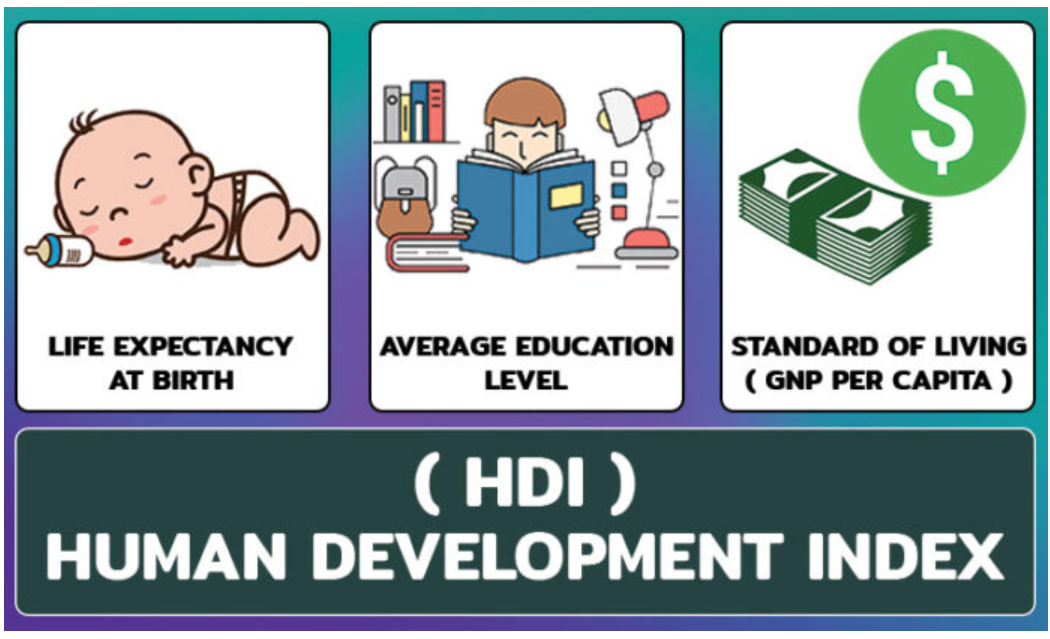

## Introduction
The Human Development Index emphasizes that a country's development should not be based solely upon the country's economic growth but should also include other factors such as people's life expectancy and their education system. So, To calculate the HDI of any country the three major components or the keys they use are the long and healthy life of the people of the country, knowledge, and their decent standard of living.
So, In this project we aim to identify :
1. the patterns indicate the correlation between education and the gross national income (GNI) per capita among countries. 
2. we will also try to find how this relationship differs among different regions.

In other words, it delves into the relationship between education and the economic growth of the country, and through this analysis, we can know how these two contribute to the life expectancy of the people living in that country.

## Data Summary

#### Source:[Human Development Index](https://hdr.undp.org/data-center/human-development-index#/indicies/HDI)

#### Use Cases:
1. Performance of Policies related to Health
> The attributes that can be used in this use case are `Life expectancy at birth` and `Country/Region`
2. Policies related to Education and their performance accross countries with similar KPIs
> The attributes that can be used in this use case are `Expected years of schooling`,`Mean years of schooling` and `Country/Region`
3. The HDI can be used to question national policy choices:
> Asking how two countries with the same level of GNI per capita can end up with different human development outcomes. These contrasts can stimulate debate about government policy priorities. This can be evaluated using all columns mentioned in the column definitions below, except the last column. 

#### Definitions
1. **_Human Development Index (HDI)_**: A composite index measuring average achievement in three basic dimensions of human development—a long and healthy life, knowledge and a decent standard of living. 
2. **_Life expectancy at birth_**: Number of years a newborn infant could expect to live if prevailing patterns of age-specific mortality rates at the time of birth stay the same throughout the infant’s life.
3. **_Expected years of schooling_**: Number of years of schooling that a child of school entrance age can expect to receive if prevailing patterns of age-specific enrolment rates persist throughout the child’s life.
4. **_Mean years of schooling_**: Average number of years of education received by people ages 25 and older, converted from education attainment levels using official durations of each level.
5. **_Gross national income (GNI) per capita_**: Aggregate income of an economy generated by its production and its ownership of factors of production, less the incomes paid for the use of factors of production owned by the rest of the world, converted to international dollars using PPP rates, divided by midyear population.
6. **_GNI per capita rank minus HDI rank_**: Difference in ranking by GNI per capita and by HDI value. A negative value means that the country is better ranked by GNI than by HDI value.
7. **_HDI rank for 2020_**: Ranking by HDI value for 2020, calculated using the same most recently revised data available in 2022 that were used to calculate HDI values for 2020.
	
#### Main data sources
1. Columns 1 and 7: HDRO calculations based on data from Barro and Lee (2018), IMF (2022), UNDESA (2022a), UNESCO Institute for Statistics (2022), United Nations Statistics Division (2022) and World Bank (2022).
2. Column 2: UNDESA (2022a).
3. Column 3: CEDLAS and World Bank (2022), ICF Macro Demographic and Health Surveys, UNESCO Institute for Statistics (2022) and UNICEF Multiple Indicator Cluster Surveys.
4. Column 4: Barro and Lee (2018), ICF Macro Demographic and Health Surveys, OECD (2022), UNESCO Institute for Statistics (2022) and UNICEF Multiple Indicator Cluster Surveys.
5. Column 5: IMF (2022), UNDESA (2022b), United Nations Statistics Division (2022) and World Bank (2022).
6. Column 6: Calculated based on data in columns 1 and 5.


https://raw.githubusercontent.com/Nikkat-Afrin/DAV-5400/master/HDR21-22_Statistical_Annex_HDI_Data_Table.csv

## Important Libraries

In [1]:
# Filtering Warnings
import warnings
warnings.filterwarnings('ignore')

#Other's
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot') #Applying style to graphs

## Reading and Understanding the Data

In [2]:
 # Reading Human Development Index data
hdi_df=pd.read_csv('https://raw.githubusercontent.com/Nikkat-Afrin/DAV-5400/master/HDR21-22_Statistical_Annex_HDI_Data_Table.csv')
hdi_df.head()

,HDI rank,Country,HDI Value,Life expectancy at birth,Expected years of schooling,Mean years of schooling,GNI per Capita,GNI per capita rank minus HDI rank,HDI rank 2020
0,1,Switzerland,0.962,84.0,16.5,13.9,"66,933",5,3
1,2,Norway,0.961,83.2,18.2,13.0,"64,660",6,1
2,3,Iceland,0.959,82.7,19.2,13.8,"55,782",11,2
3,4,"Hong Kong, China (SAR)",0.952,85.5,17.3,12.2,"62,607",6,4
4,5,Australia,0.951,84.5,21.1,12.7,"49,238",18,5


Inspect the various aspects of the data dataframe

In [3]:
hdi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   HDI rank                            195 non-null    int64  
 1   Country                             195 non-null    object 
 2   HDI Value                           195 non-null    object 
 3   Life expectancy at birth            195 non-null    float64
 4   Expected years of schooling         195 non-null    object 
 5   Mean years of schooling             195 non-null    object 
 6   GNI per Capita                      195 non-null    object 
 7   GNI per capita rank minus HDI rank  195 non-null    object 
 8   HDI rank 2020                       195 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 13.8+ KB


In [4]:
# Get the summary of the dataframe using 'describe()'
hdi_df.describe()

,HDI rank,Life expectancy at birth
count,195.000000,195.000000
mean,97.815385,71.277949
std,56.467551,7.746484
min,1.000000,52.500000
25%,49.500000,65.700000
50%,97.000000,71.700000
75%,146.000000,76.700000
max,195.000000,85.900000


In [5]:
# Get the shape of the dataset
hdi_df.shape

(195, 9)

## EDA

## Step : 1 Data Cleaning

As We have noted the dataframe contains some ```..``` values it means these are the Missing values

In [6]:
# Checking whether if there is any missing value.
round(100*(hdi_df.isnull().sum()/len(hdi_df.index)),2).sort_values(ascending = False)

HDI rank                              0.0
Country                               0.0
HDI Value                             0.0
Life expectancy at birth              0.0
Expected years of schooling           0.0
Mean years of schooling               0.0
GNI per Capita                        0.0
GNI per capita rank minus HDI rank    0.0
HDI rank 2020                         0.0
dtype: float64

In [7]:
# Replacing Select values with nan values
hdi_df = hdi_df.replace('..', np.nan)

In [8]:
# Checking whether if there is any missing value.
round(100*(hdi_df.isnull().sum()/len(hdi_df.index)),2).sort_values(ascending = False)

HDI Value                             2.05
Mean years of schooling               2.05
GNI per capita rank minus HDI rank    2.05
HDI rank 2020                         2.05
Expected years of schooling           1.03
GNI per Capita                        1.03
HDI rank                              0.00
Country                               0.00
Life expectancy at birth              0.00
dtype: float64

In [9]:
# Since the nulls are insignificant we can drop them in order for working with the rest of the data in a better way
hdi_df = hdi_df.dropna()

Here we found that there are some  ```Missing values``` which we treated

In [10]:
# Checking for duplicates values
hdi_df.loc[hdi_df.duplicated()]

,HDI rank,Country,HDI Value,Life expectancy at birth,Expected years of schooling,Mean years of schooling,GNI per Capita,GNI per capita rank minus HDI rank,HDI rank 2020


### Datatype correction

In [11]:
# Looking at column's datatypes
hdi_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191 entries, 0 to 190
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   HDI rank                            191 non-null    int64  
 1   Country                             191 non-null    object 
 2   HDI Value                           191 non-null    object 
 3   Life expectancy at birth            191 non-null    float64
 4   Expected years of schooling         191 non-null    object 
 5   Mean years of schooling             191 non-null    object 
 6   GNI per Capita                      191 non-null    object 
 7   GNI per capita rank minus HDI rank  191 non-null    object 
 8   HDI rank 2020                       191 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 14.9+ KB


There needs to be datatype correction done on the columns:
- `HDI rank` needs to be Integer
- `HDI Value` needs to be Float
- `Expected years of schooling` needs to be Float
- `Mean years of schooling` needs to be Float
- `GNI per Capita` needs to be Integer
- `GNI per capita rank minus HDI rank` needs to be Integer
- `HDI rank 2020` needs to be Integer

In [12]:
integer_col_list = ["HDI rank","GNI per Capita","GNI per capita rank minus HDI rank","HDI rank 2020"]
float_col_list = ["HDI Value","Expected years of schooling","Mean years of schooling"]

# Convert to in
for col in integer_col_list:
    # Remove commas from strings in order to prepare for float converion
    if str(hdi_df[col].dtype) == 'object':
        hdi_df[col] = hdi_df[col].str.replace(',', '')
    # First converting to Float in order to handle null values then into int so that no errors come because of nulls
    hdi_df[col] = hdi_df[col].astype(float).astype(int)

# Convert to float
for col in float_col_list:
    # Remove commas from strings in order to prepare for float converion
    if str(hdi_df[col].dtype) == 'object':
        hdi_df[col] = hdi_df[col].str.replace(',', '')
    hdi_df[col] = hdi_df[col].astype(float)


In [13]:
# Looking at column's datatypes
hdi_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191 entries, 0 to 190
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   HDI rank                            191 non-null    int32  
 1   Country                             191 non-null    object 
 2   HDI Value                           191 non-null    float64
 3   Life expectancy at birth            191 non-null    float64
 4   Expected years of schooling         191 non-null    float64
 5   Mean years of schooling             191 non-null    float64
 6   GNI per Capita                      191 non-null    int32  
 7   GNI per capita rank minus HDI rank  191 non-null    int32  
 8   HDI rank 2020                       191 non-null    int32  
dtypes: float64(4), int32(4), object(1)
memory usage: 11.9+ KB


In [14]:
# Get the summary of the dataframe using 'describe()'
hdi_df.describe()

,HDI rank,HDI Value,Life expectancy at birth,Expected years of schooling,Mean years of schooling,GNI per Capita,GNI per capita rank minus HDI rank,HDI rank 2020
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000
mean,95.811518,0.720576,71.314660,13.530366,8.983770,20249.094241,0.188482,95.811518
std,55.307333,0.150661,7.646519,2.926039,3.173193,21825.264062,14.060249,55.279634
min,1.000000,0.385000,52.500000,5.500000,2.100000,732.000000,-47.000000,1.000000
25%,48.500000,0.599500,65.750000,11.600000,6.250000,4593.000000,-8.000000,48.500000
50%,96.000000,0.739000,71.700000,13.400000,9.300000,12306.000000,2.000000,96.000000
75%,143.500000,0.835000,76.700000,15.600000,11.500000,30079.500000,9.000000,143.000000
max,191.000000,0.962000,85.500000,21.100000,14.100000,146830.000000,37.000000,191.000000


In [15]:
hdi_df.tail()

,HDI rank,Country,HDI Value,Life expectancy at birth,Expected years of schooling,Mean years of schooling,GNI per Capita,GNI per capita rank minus HDI rank,HDI rank 2020
186,187,Burundi,0.426,61.7,10.7,3.1,732,4,187
187,188,Central African Republic,0.404,53.9,8.0,4.3,966,1,188
188,189,Niger,0.400,61.6,7.0,2.1,1240,-3,189
189,190,Chad,0.394,52.5,8.0,2.6,1364,-7,190
190,191,South Sudan,0.385,55.0,5.5,5.7,768,-1,191


#### Univariate Analysis (Continuous)

In [130]:
# Numeric columns of interest
col_num = ["HDI Value","Life expectancy at birth","Expected years of schooling","Mean years of schooling","GNI per Capita","GNI per capita rank minus HDI rank"]

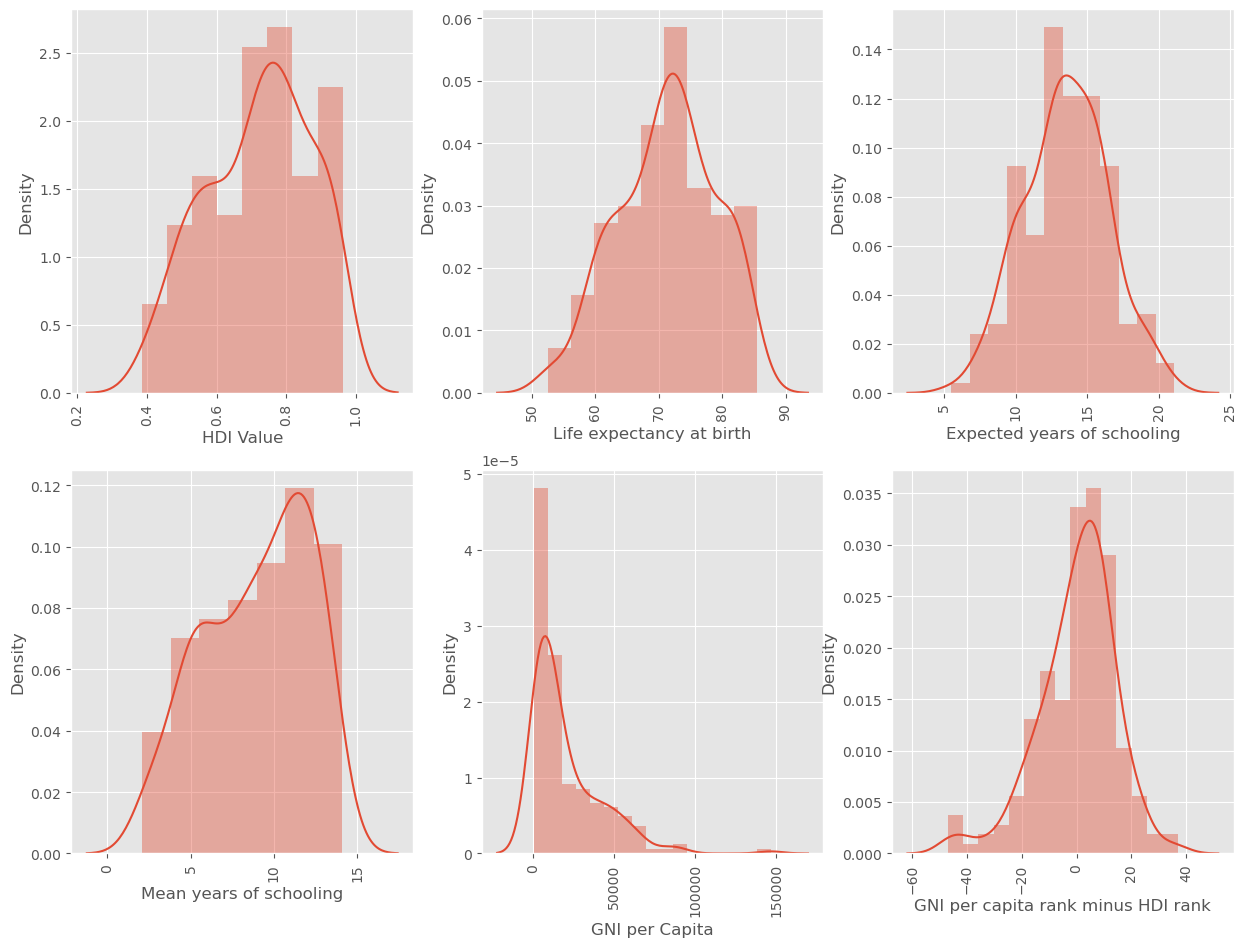

In [131]:


plt.figure(figsize=(15,15))
plt.subplots_adjust(bottom=.01)
for i in enumerate(col_num):
    
    plt.subplot(3,3, i[0]+1)
    sns.distplot(hdi_df[i[1]])
    
    plt.xticks(rotation=90)
# plt.savefig('coniouus_univar.png',dpi=300,transparent=True)
plt.show()

#### Insights :-
- GNI per capita rank minus HDI rank seems to be in Normal distribution
- HDI Value:Most countries seem to have an HDI value around 0.7-0.8, indicating a high level of human development.
- Life Expectancy at Birth:It appears that in a majority of countries, people are expected to live between 70-80 years.
- Expected Years of Schooling:In many countries, people are expected to have approximately 10-15 years of schooling.
- Mean Years of Schooling:Most countries seem to have an average of around 8-9 years of schooling.
- GNI per Capita Rank minus HDI Rank:  The peak is around 10, indicating that for many countries, their GNI per capita rank is about 10 places higher than their HDI rank.


In [132]:
import textwrap

# Function to wrap text
def wrap_title(text, width=20):
    return "\n".join(textwrap.wrap(text, width))

### Boxplots distribution for each col_num 

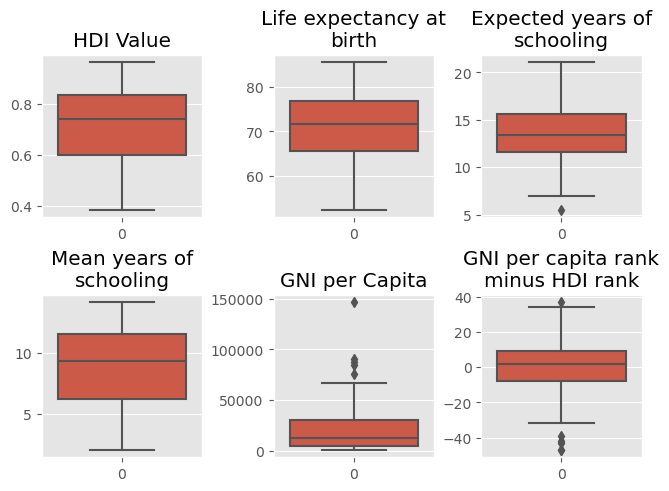

In [133]:
# Plot Configuration 
fig , axes = plt.subplots(nrows=2, ncols=3, constrained_layout=True)                 
fig.subplots_adjust(left= 0, bottom=0, right=3, top=12, wspace=0.09, hspace=0.3)

for ax, column in zip(axes.flatten(),col_num):
    sns.boxplot(hdi_df[column],ax=ax)
    #ax.set_title(column)
    ax.set_title(wrap_title(column))


#### Insights:
- HDI Value: The first box plot shows the distribution of the Human Development Index (HDI) values across different countries. Most countries seem to have an HDI value around 0.7-0.8, indicating a high level of human development.
- Life Expectancy at Birth: The second box plot shows the distribution of life expectancy at birth across different countries. It appears that in a majority of countries, people are expected to live between 70-80 years.
- Expected Years of Schooling: The third box plot shows the distribution of the expected years of schooling across different countries. In many countries, people are expected to have approximately 15 years of schooling.
- Mean Years of Schooling: The fourth box plot shows the distribution of the mean years of schooling across different countries. Most individuals seem to have around 8-10 years of schooling on average.
- GNI per Capita: The fifth box plot shows the distribution of Gross National Income (GNI) per capita. The GNI per capita has a wide range but is mostly concentrated around the $40,000 mark.
- GNI per Capita Rank Minus HDI Rank: The sixth box plot represents the difference between the GNI per capita rank and the Human Development Index (HDI) rank for each country. The distribution is balanced around zero, indicating that there isn’t a significant discrepancy between the GNI per capita rank and HDI rank for most countries.

### Correlation 

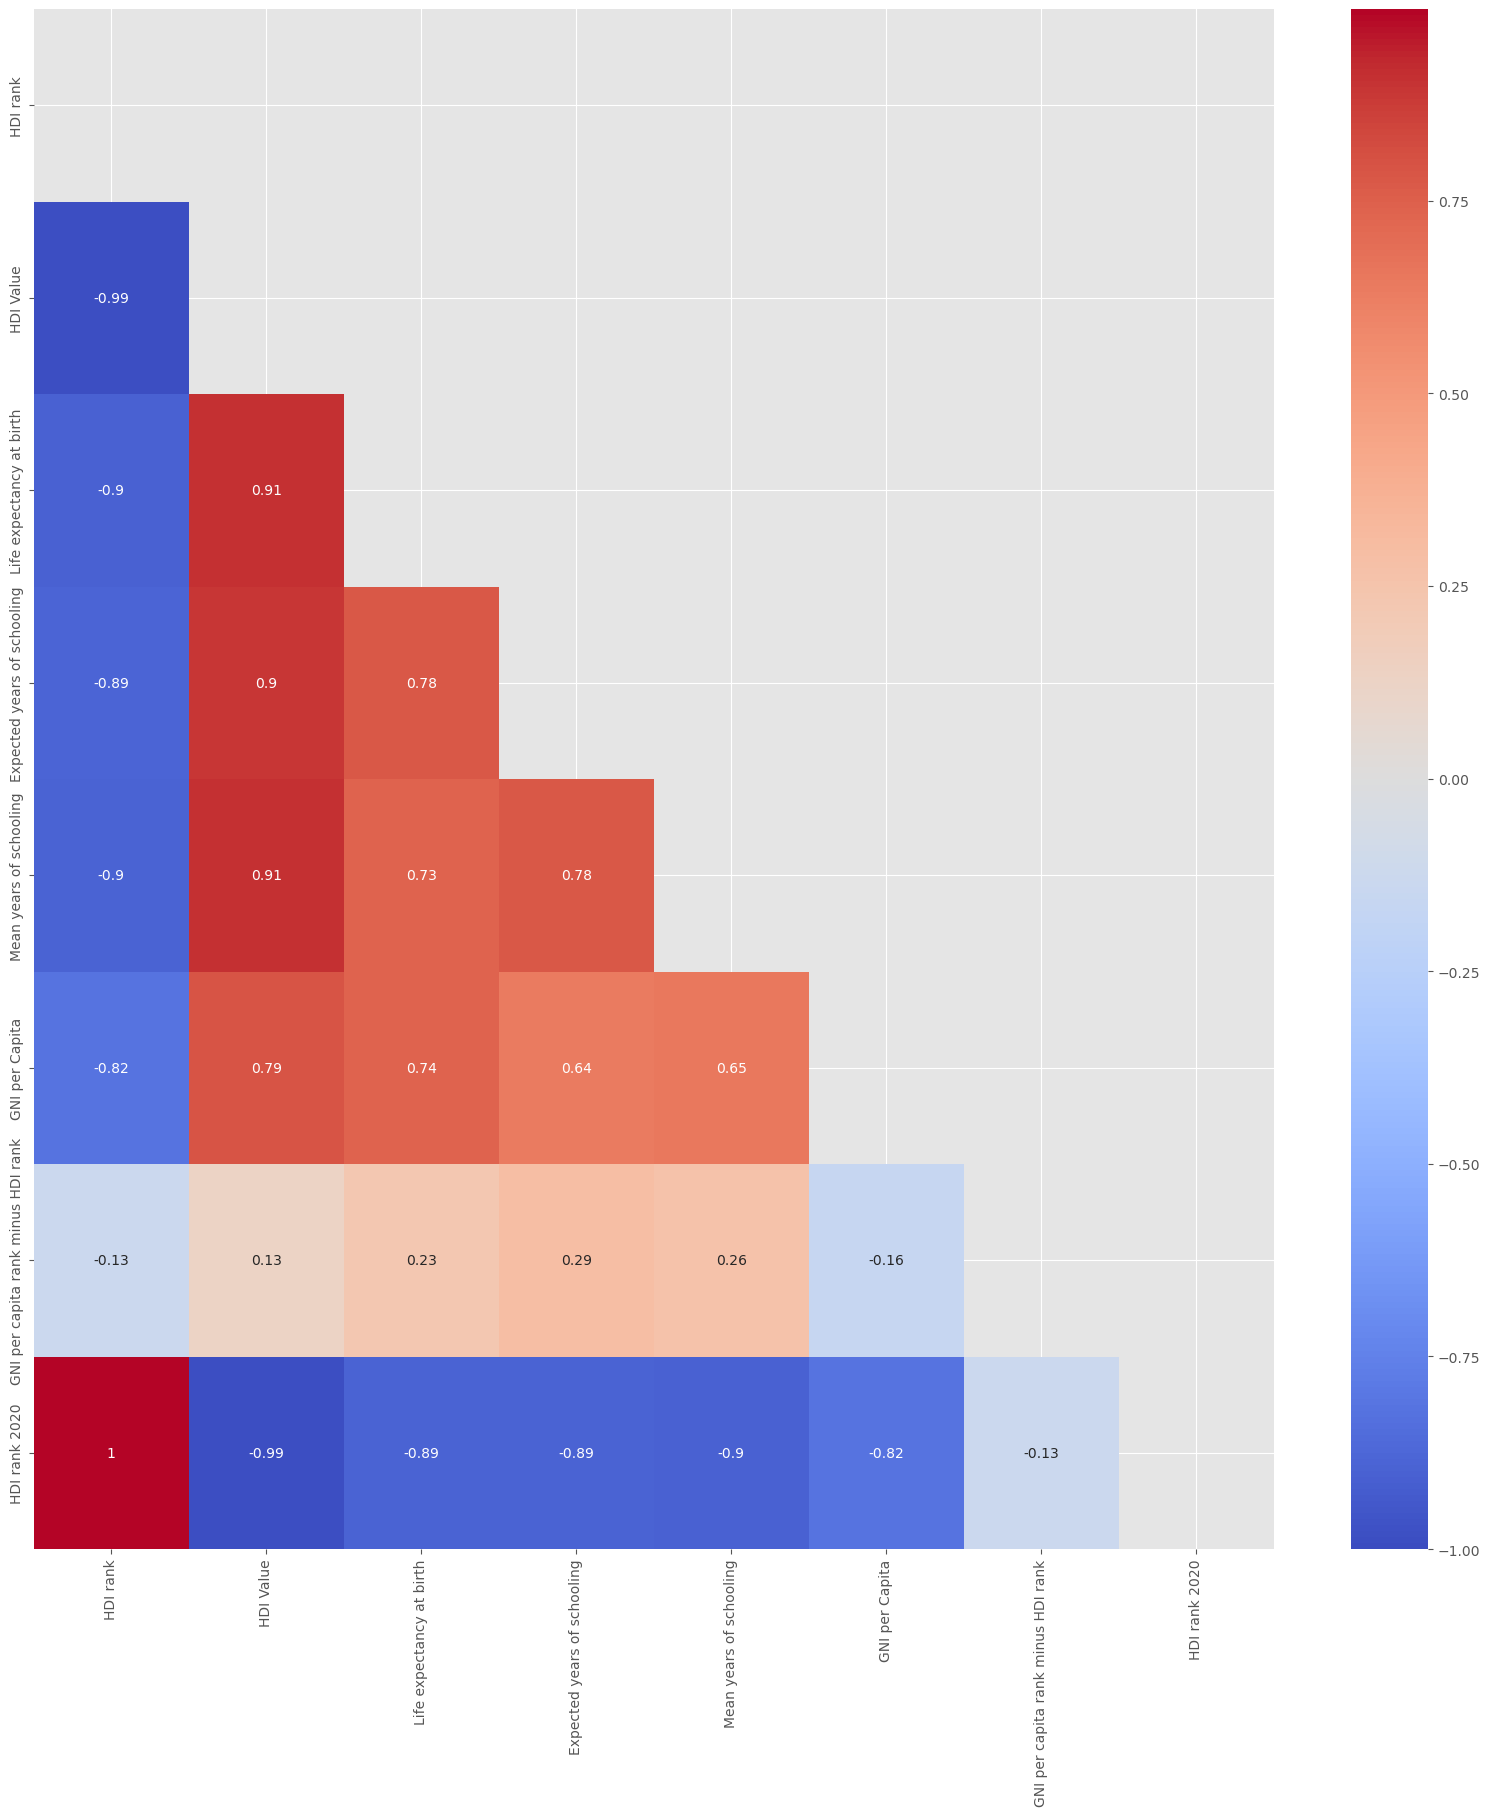

In [134]:
# Finding the Correlation using HeatMap
col_list = hdi_df.columns
col_list = col_list.drop('Country')
plt.figure(figsize = (20, 20))
mask = np.zeros(hdi_df[col_list].corr().shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
sns.heatmap(hdi_df[col_list].corr(), annot = True, vmin=-1,cmap='coolwarm',mask=mask)
plt.show()

- As it is evident from the heatmap there is a highly negative correlation between Mean Years of schooling and HDI rank 2020.
- Similarly HDI Value seems to be highly negatively correlated to HDI rank 2020
- There is a significant positive correlation present between HDI Value and Mean years of schooling, Expected years of schooling, and Life expectency at birth 

##  Inference

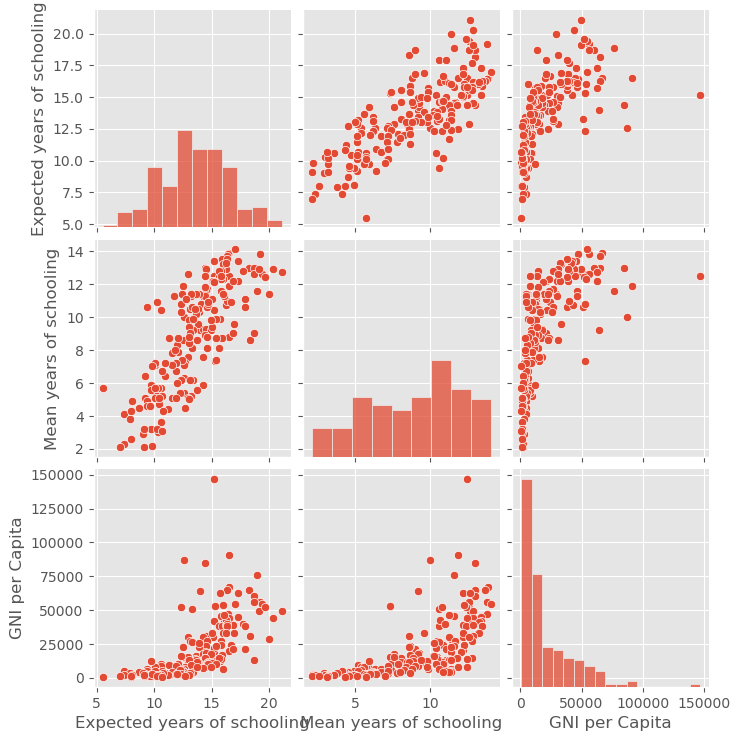

In [135]:
sns.pairplot(hdi_df[["Expected years of schooling","Mean years of schooling","GNI per Capita"]])

### insights:
- Expected Years of Schooling vs Mean Years of Schooling: The scatter plot shows a positive correlation between these two variables. This suggests that in countries where individuals are expected to have more years of schooling, they also tend to have a higher average number of years of schooling.
- Histograms: The diagonal cells of the matrix contain histograms showing the distribution of each variable. These histograms can provide insights into the range and concentration of each variable. For example, the histogram for Expected Years of Schooling suggests that most countries have an expectation of around 10-15 years of schooling.
- GNI per Capita: The scatter plots involving GNI per Capita do not show a clear trend, suggesting that there may not be a strong linear relationship between GNI per Capita and the other two variables. However, there could still be a non-linear relationship or other factors at play.

### Conclusion
After looking at the relationship between Gross National Income (GNI) and Expected Years of Schooling across different countries, it is very clear that there are no trends or strong linear correlations between these two columns. even though at initial stage where i assumed that there is a relationship between the education and the per capita income of the country that actually turned out to be false.

THis clearly states that only education and gross national income doesnt decide the prosperity of the country there are so many other factors which influence the actual development of the country. The higher income may really contribute to the increase of the literacy rate of the country.

It's really important for policymakers and stakeholders to understand this when formulating education and economic development strategies. Simply, increasing GNI may not guarantee improvements in educational outcomes without addressing other essential factors.

Hence forth, the GNI dosen't solely depend on the expected years of schooling and the mean year of schooling.

### References:

- Barro, R. J., and J.‑W. Lee. 2018. Dataset of Education­al Attainment, June 2018 Revision. http://www.barrolee.com. Accessed 7 April 2022. 
- CEDLAS (Center for Distributive, Labor and Social Studies) and World Bank. 2022. Socio-Economic Database for Latin America and the Caribbean. https://www.cedlas.econo.unlp.edu.ar/wp/en/estadisticas/sedlac/estadisticas/. Accessed 7 April 2022. 
- Eurostat. 2021. European Union Statistics on Income and Living Conditions. EUSILC UDB 2021 – version of November 2021. Brussels. https://ec.europa.eu/eurostat/web/microdata/european-union-statistics-on-income-and-living-conditions. Accessed 8 -February 2022. 
- Global Carbon Project. 2022. Global Carbon Atlas. https://www.globalcarbonproject.org/. Accessed 23 June 2022. 
- ICF Macro. Various years. Demographic and Health Surveys. https://dhsprogram.com. Accessed 6 May 2022. 
- ILO (International Labour Organization). 2022. ILO­STAT database. https://ilostat.ilo.org/data/. Accessed 14 April 2022. 
- IMF (International Monetary Fund). 2021. World Eco­nomic Outlook database. Washington, DC. https://www.imf.org/en/Publications/WEO/weo-database/2021/October. Accessed 21 April 2022.
- IMF (International Monetary Fund). 2022. World Eco­nomic Outlook database. Washington, DC. https://www.imf.org/en/Publications/WEO/weo-database/2022/April. Accessed 21 April 2022. 
- IPU (Inter‑Parliamentary Union). 2022. Parline da­tabase: Monthly ranking of women in national parlia­ments. https://data.ipu.org/women-ranking. Accessed 14 April 2022. 
- LIS (Luxembourg Income Study). 2022. Luxembourg Income Study Project. https://www.lisdatacenter.org/data-access. Accessed 31 March 2022. 
- OECD (Organisation for Economic Co‑operation and Development). 2022. OECD.Stat. https://stats.oecd.org/. Accessed 7 April 2022. 
- UNDESA (United Nations Department of Economic and Social Affairs). 2019. World Population Prospects: The 2019 Revision. Rev 1. New York. https://population.un.org/wpp/. Accessed 8 July 2021. 
- UNDESA (United Nations Department of Economic and Social Affairs). 2022a. World Population Pros­pects: The 2022 Revision. New York. https://population.un.org/wpp/. Accessed 11 July 2022. 
- UNDESA (United Nations Department of Economic and Social Affairs). 2022b. World Economic Situation and Prospects 2022. https://www.un.org/development/desa/dpad/publication/world-economic-situation-and-prospects-2022/. Accessed 4 May 2022. 
- UNEP (United Nations Environment Programme). 2022. World Environment Situation Room, Data down­loader. https://wesr.unep.org/downloader. Accessed 23 June 2022.
- UNESCO (United Nations Educational, Scientific and Cultural Organization) Institute for Statistics. 2022. UIS Developer Portal, Bulk Data Download Service. https://apiportal.uis.unesco.org/bdds. Accessed 28 April 2022. 
- UNICEF (United Nations Children’s Fund). Various years. Multiple Indicator Cluster Surveys. New York. http://mics.unicef.org. Accessed 11 March 2022. 
- United Nations Statistics Division. 2022. National Accounts Main Aggregates Database. https://unstats.un.org/unsd/snaama. Accessed 27 April 2022. 
- WHO (World Health Organization), UNICEF (United Nations Children’s Fund), UNFPA (United Nations Population Fund), World Bank Group and United Na­tions Population Division. 2019. Trends in Maternal Mortality: 2000 to 2017: Estimates by WHO, UNICEF, UNFPA, World Bank Group and the United Nations Population Division. Geneva: World Health Organiza­tion. https://apps.who.int/iris/handle/10665/327595. Accessed 7 February 2022. 
- World Bank. 2021. World Development Indicators da­tabase. Washington, DC. http://data.worldbank.org. Accessed 8 July 2021. 
- World Bank. 2022. World Development Indicators da­tabase. Washington, DC. http://data.worldbank.org. Accessed 28 April 2022. 
- World Inequality Database. 2022. World Inequality Database. http://wid.world. Accessed 6 July 2022.

#### Coding references:
- https://www.javatpoint.com/python-tutorial
- https://www.javatpoint.com/python-tutorial
